<a href="https://colab.research.google.com/github/EsaJud/predict_rainfall2.0/blob/main/Rainfall_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Logistic Regression to Predict Rainfall Occurence**

 Logistic regression is a simple yet powerful classification algorithm that models the probability of a binary outcome(i.e rain/no rain) based on one or more predictor variables. Unlike linear regression, which predicts continuous outcomes, logistic regression is designed to predict categorical outcomes thus, making it well-suited for rainfall prediction.

 We will use a simple dataset to predict rainfall occurence. The more the variables that can aid in prediction then the better the accuracy of the prediction.

### **Importing of the libraries and dataset**

In [ ]:
# Import of the libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load the dataset
df = pd.read_csv('/content/drive/MyDrive/rainfall.csv')
df.head()

,date,rainfall,temperature,humidity,wind_speed,weather_condition
0,1/1/2022,12.5,15.2,78,8.5,Rainy
1,1/2/2022,8.2,17.8,65,5.2,Rainy
2,1/3/2022,0.0,20.1,52,3.1,Sunny
3,1/4/2022,3.7,18.6,71,6.7,Rainy
4,1/5/2022,21.1,14.8,82,9.3,Rainy


In [ ]:
df.shape

(53, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               53 non-null     object 
 1   rainfall           53 non-null     float64
 2   temperature        53 non-null     float64
 3   humidity           53 non-null     int64  
 4   wind_speed         53 non-null     float64
 5   weather_condition  53 non-null     object 
dtypes: float64(3), int64(1), object(2)
memory usage: 2.6+ KB


From the data frame information , we can observe that there are no null values in each column.

In [ ]:
#Descriptive data analysis of the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rainfall,53.0,9.049057,6.712521,0.0,3.9,8.3,14.8,21.8
temperature,53.0,17.950943,2.500663,13.9,16.1,17.8,19.4,23.4
humidity,53.0,69.245283,11.969361,44.0,62.0,72.0,78.0,89.0
wind_speed,53.0,6.403774,2.209069,2.1,4.7,6.7,8.3,10.5


### **Exploratory Data Analysis**
 This was performed to understand the distribution of variables and detect any anomalies or unusual patterns. It was also to explore relationships between the variablesso as to uncover potential correlations or dependencies.

In [ ]:
# Check the 'date' column
print(df['date'].unique())

['1/1/2022' '1/2/2022' '1/3/2022' '1/4/2022' '1/5/2022' '1/6/2022'
 '1/7/2022' '1/8/2022' '1/9/2022' '1/10/2022' '1/11/2022' '1/12/2022'
 '1/13/2022' '1/14/2022' '1/15/2022' '1/16/2022' '1/17/2022' '1/18/2022'
 '1/19/2022' '1/20/2022' '1/21/2022' '1/22/2022' '1/23/2022' '1/24/2022'
 '1/25/2022' '1/26/2022' '1/27/2022' '1/28/2022' '1/29/2022' '1/30/2022'
 '1/31/2022' '2/1/2022' '2/2/2022' '2/3/2022' '2/4/2022' '2/5/2022'
 '2/6/2022' '2/7/2022' '2/8/2022' '2/9/2022' '2/10/2022' '2/11/2022'
 '2/12/2022' '2/13/2022' '2/14/2022' '2/15/2022' '2/16/2022' '2/17/2022'
 '2/18/2022' '2/19/2022' '2/20/2022' '2/21/2022' '2/22/2022']


In [ ]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [ ]:
# Convert 'weather_condition' to binary values
df['weather_condition'] = df['weather_condition'].map({'Rainy': 1, 'Sunny': 0})

# Now 'weather_condition' column contains binary values: 1 for Rainy and 0 for Sunny
print(df.head())

        date  rainfall  temperature  humidity  wind_speed  weather_condition
0 2022-01-01      12.5         15.2        78         8.5                  1
1 2022-01-02       8.2         17.8        65         5.2                  1
2 2022-01-03       0.0         20.1        52         3.1                  0
3 2022-01-04       3.7         18.6        71         6.7                  1
4 2022-01-05      21.1         14.8        82         9.3                  1


In [ ]:
# Omit the 'date' column
df2 = df.drop(columns=['date'])

        rainfall  temperature   humidity  wind_speed  weather_condition
count  53.000000    53.000000  53.000000   53.000000          53.000000
mean    9.049057    17.950943  69.245283    6.403774           0.792453
std     6.712521     2.500663  11.969361    2.209069           0.409432
min     0.000000    13.900000  44.000000    2.100000           0.000000
25%     3.900000    16.100000  62.000000    4.700000           1.000000
50%     8.300000    17.800000  72.000000    6.700000           1.000000
75%    14.800000    19.400000  78.000000    8.300000           1.000000
max    21.800000    23.400000  89.000000   10.500000           1.000000


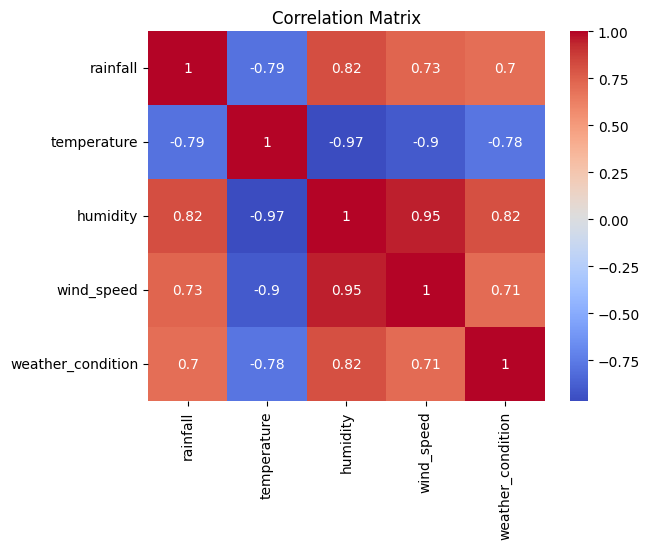

In [ ]:
# Summary statistics
print(df2.describe())

# Visualize correlations
sb.heatmap(df2.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Key observations**

Strong Positive Correlations: Rainfall is positively correlated with humidity, wind speed, and weather condition.

Strong Negative Correlations: Rainfall is negatively correlated with temperature.

Very Strong Correlations: Humidity and wind speed are highly positively correlated, while temperature and humidity are highly negatively correlated.

In [ ]:
df2['weather_condition'].value_counts()

weather_condition
1    42
0    11
Name: count, dtype: int64

### **Feature Engineering**
 Feature engineering helps in identifying and removing irrelevant or redundant features that may negatively impact model performance or introduce noise. For our case, since the data is imbalanced there is a need to perform oversampling. This can lead to new insights and better model understanding.

In [ ]:
#Identify features and target variable
X = df2.drop('weather_condition', axis=1)  # Features
y = df2['weather_condition']               # Target variable

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Apply oversampling using RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_oversampled, y_oversampled = oversampler.fit_resample(X, y)

In [ ]:
# Create a DataFrame for the oversampled data
new_df = pd.DataFrame(X_oversampled, columns=X.columns)
new_df['weather_condition'] = y_oversampled

In [ ]:
new_df['weather_condition'].value_counts()

weather_condition
1    42
0    42
Name: count, dtype: int64

In [ ]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler().fit(X_oversampled)
x_transform = pre_process.fit_transform(X_oversampled)

In [ ]:
y_oversampled.shape

(84,)

In [ ]:
X_oversampled.shape

(84, 4)

### **Data Splitting**

In [ ]:
# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_transform, y_oversampled, test_size = .10, random_state = 100)

In [ ]:
# Import model
from sklearn.linear_model import LogisticRegression

print('Logistic Regression')
# Create instance of model
log_reg = LogisticRegression()

# Pass training data into model
log_reg.fit(x_train, y_train)


Logistic Regression


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_log_reg = log_reg.predict(x_test)
# Score It

print('Logistic Regression')
# Accuracy
print('--'*30)
log_reg_accuracy = round(accuracy_score(y_test, y_pred_log_reg) * 100,2)
print('Accuracy', log_reg_accuracy,'%')

Logistic Regression
------------------------------------------------------------
Accuracy 88.89 %


In [ ]:
print(f"Unique labels in y_test: {np.unique(y_test)}")
print(f"Unique labels in y_pred_log_reg: {np.unique(y_pred_log_reg)}")

Unique labels in y_test: [0 1]
Unique labels in y_pred_log_reg: [0 1]


In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

# Assuming 'Rainy' corresponds to the numeric value 1
pos_label_value = 1

# Calculate precision and recall
precision = precision_score(y_test, y_pred_log_reg, pos_label=pos_label_value)
recall = recall_score(y_test, y_pred_log_reg, pos_label=pos_label_value)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"* 30)

Precision: 1.00
Recall: 0.83
--


A recall of 0.83 means that the model correctly identified 83% of the actual 'Rainy' days. However, it missed 17% of them, labeling those days incorrectly.

[[3 0]
 [1 5]]


<Axes: >

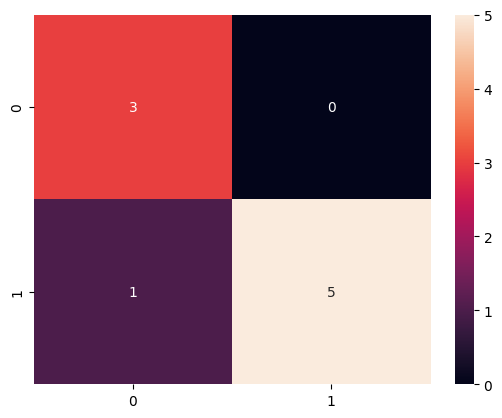

In [ ]:
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_log_reg)
print(confusion)

# Visualize confusion matrix using a heatmap
sb.heatmap(confusion, annot=True, fmt="d")

### **Conclusion**



*   The model correctly identified 3 out of 3 'Sunny' days and 5
out of 6 'Rainy' days.
*   The model did not incorrectly classify any 'Sunny' days as 'Rainy' (no false positives), which aligns with the precision of 1.00.
*  There was 1 'Rainy' day that the model failed to identify correctly, classifying it as 'Sunny' instead (false negative).

Overally, logistic regression's simplicity,  and effectiveness in binary classification tasks make it a valuable tool for rainfall prediction. It allows for the creation of robust, easy-to-understand models that can be easily integrated into decision-making processes and operational systems.
